In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("ReportInfectionStatsMalaria.csv")

In [3]:
df.head()

,Time,NodeID,IndividualID,Gender,AgeYears,InfectionID,Infectiousness,Duration,Hepatocytes,IRBCs,Gametocytes
0,18250,1,12845,M,41.87400,465441,0.000000,1,2,0,0
1,18250,1,16754,F,30.60270,462944,0.000855,126,0,477,1007401
2,18250,1,18089,M,26.86300,460201,0.000080,249,0,57544004,319690
3,18250,1,13,M,54.55590,464321,0.011124,59,0,26362902259,71100043
4,18250,1,24684,M,8.05479,465199,0.000000,14,0,170465866,0


In [4]:
df.columns

Index(['Time', 'NodeID', 'IndividualID', 'Gender', 'AgeYears', 'InfectionID',
       'Infectiousness', 'Duration', 'Hepatocytes', 'IRBCs', 'Gametocytes'],
      dtype='object')

In [5]:
df = df[["Time", "IndividualID", "InfectionID", "IRBCs"]]

In [17]:
df = df[df["IRBCs"] > 0]

In [18]:
# Group over time and individual ID, and compute number of unique infection IDs
df_grouped = df.groupby(["Time", "IndividualID"]).agg({"InfectionID": "nunique"}).reset_index()

In [21]:
df_poly = df_grouped[df_grouped["InfectionID"] > 1].reset_index(drop=True)

In [22]:
df_poly

,Time,IndividualID,InfectionID
0,18250,349,2
1,18250,364,2
2,18250,954,2
3,18250,1179,2
4,18250,1394,2
...,...,...,...
324030,21870,29818,2
324031,21870,30161,2
324032,21870,30177,2
324033,21870,30308,2


In [26]:
# For each time and individualID in df_poly, compute the maximum number of IRBCs
df_max_irbcs = df.groupby(["Time", "IndividualID"]).agg({"IRBCs": "max"}).reset_index()
df_min_irbcs = df.groupby(["Time", "IndividualID"]).agg({"IRBCs": "min"}).reset_index()

df_max_irbcs = df_max_irbcs.merge(df_poly, on=["Time", "IndividualID"], how="inner")
df_min_irbcs = df_min_irbcs.merge(df_poly, on=["Time", "IndividualID"], how="inner")

df_max_irbcs = df_max_irbcs.rename(columns={"IRBCs": "MaxIRBCs"})
df_min_irbcs = df_min_irbcs.rename(columns={"IRBCs": "MinIRBCs"})

df_max_irbcs = df_max_irbcs[["Time", "IndividualID", "MaxIRBCs"]]
df_min_irbcs = df_min_irbcs[["Time", "IndividualID", "MinIRBCs"]]

foo = df_max_irbcs.merge(df_min_irbcs, on=["Time", "IndividualID"], how="inner")

In [28]:
foo["ratio"] = foo["MinIRBCs"] / foo["MaxIRBCs"]

0.001732378089850265
0.09855906653804065


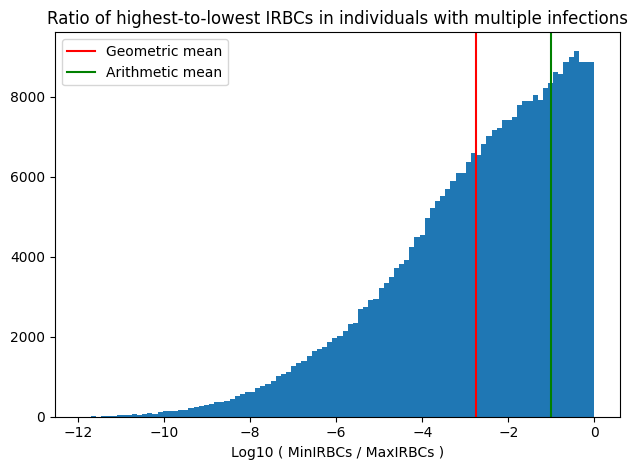

In [38]:
plt.hist(np.log10(foo["ratio"]), bins=100)
plt.xlabel("Log10 ( MinIRBCs / MaxIRBCs )")

# Geometric mean of the ratios
print(np.exp(np.mean(np.log(foo["ratio"]))))
plt.axvline(np.log10(np.exp(np.mean(np.log(foo["ratio"])))), color="red", label="Geometric mean")

# Arithmetic mean
print(np.mean(foo["ratio"]))
plt.axvline(np.log10(np.mean(foo["ratio"])), color="green", label="Arithmetic mean")

plt.legend()
plt.title("Ratio of highest-to-lowest IRBCs in individuals with multiple infections")

plt.tight_layout()

0.001732378089850265